<a href="https://colab.research.google.com/github/developr4u/practice/blob/master/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 41kB/s 
     |████████████████████████████████| 4.3MB 35.3MB/s 
     |████████████████████████████████| 501kB 54.8MB/s 


In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D,MaxPool2D
from tensorflow.keras.optimizers import Adam

print(tf.__version__)


2.0.0-rc0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from sklearn import datasets,metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
cancer = datasets.load_breast_cancer()

In [32]:
x = pd.DataFrame(data = cancer.data,columns = cancer.feature_names)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
len(x)

569

In [0]:
y = cancer.target


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)
len(x_test),x_train.shape

(114, (455, 30))

In [0]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [37]:
x_train = x_train.reshape(455,30,1)
x_test = x_test.reshape(114,30,1)
x_train.shape

(455, 30, 1)

In [38]:
model = Sequential()
model.add(Conv1D(32,(2),activation='relu',input_shape=(30,1,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,(2),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [0]:
model.compile(optimizer=Adam(lr=0.00005),loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
history = model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),verbose=1)

Train on 455 samples, validate on 114 samples
Epoch 1/50
455/455 [==============================] - 1s 3ms/sample - loss: 0.8632 - accuracy: 0.6352 - val_loss: 0.6402 - val_accuracy: 0.7807
Epoch 2/50
455/455 [==============================] - 0s 348us/sample - loss: 0.5520 - accuracy: 0.7473 - val_loss: 0.5884 - val_accuracy: 0.8158
Epoch 3/50
455/455 [==============================] - 0s 355us/sample - loss: 0.4079 - accuracy: 0.8264 - val_loss: 0.5431 - val_accuracy: 0.7982
Epoch 4/50
455/455 [==============================] - 0s 345us/sample - loss: 0.3383 - accuracy: 0.8703 - val_loss: 0.5034 - val_accuracy: 0.8070
Epoch 5/50
455/455 [==============================] - 0s 368us/sample - loss: 0.3668 - accuracy: 0.8703 - val_loss: 0.4710 - val_accuracy: 0.7982
Epoch 6/50
455/455 [==============================] - 0s 347us/sample - loss: 0.2798 - accuracy: 0.8791 - val_loss: 0.4448 - val_accuracy: 0.7982
Epoch 7/50
455/455 [==============================] - 0s 357us/sample - loss: 0.

In [0]:
epoch = 50
def lerning_curve(history,epoch):
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('validation & train_accuracy')
  plt.legend('train','val')
  plt.show()
  
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('validation & train_loss')
  plt.legend('train','val')
  plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


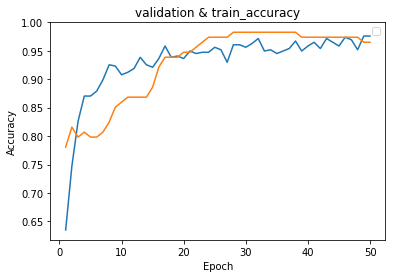

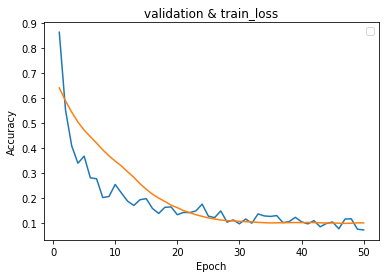

In [53]:
lerning_curve(history,epoch)